In [24]:
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk


# Input data files are available in the "../input/" directory.
from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [25]:
df = pd.read_csv("Reviews.csv", index_col = 0)
print("Number of reviews = {}".format(len(df)))

Number of reviews = 568454


In [26]:
df.ProductId.value_counts().head()

B007JFMH8M    913
B002QWP89S    632
B002QWP8H0    632
B0026RQTGE    632
B002QWHJOU    632
Name: ProductId, dtype: int64

In [27]:

df.ProfileName.head()


Id
1                         delmartian
2                             dll pa
3    Natalia Corres "Natalia Corres"
4                               Karl
5      Michael D. Bigham "M. Wassir"
Name: ProfileName, dtype: object

In [21]:
df.UserId.head()

0    A3SGXH7AUHU8GW
1    A1D87F6ZCVE5NK
2     ABXLMWJIXXAIN
3    A395BORC6FGVXV
4    A1UQRSCLF8GW1T
Name: UserId, dtype: object

In [33]:

df.Score.value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

In [22]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568428 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [6]:
df.describe()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,1.743817,2.22881,4.183199,1.296257e+09
std,7.636513,8.28974,1.310436,4.804331e+07
min,0.000000,0.00000,1.000000,9.393408e+08
25%,0.000000,0.00000,4.000000,1.271290e+09
50%,0.000000,1.00000,5.000000,1.311120e+09
75%,2.000000,2.00000,5.000000,1.332720e+09
max,866.000000,923.00000,5.000000,1.351210e+09


In [10]:
type(df)

pandas.core.frame.DataFrame

In [28]:
df.ProductId=='B007JFMH8M'


Id
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
30        False
          ...  
568425    False
568426    False
568427    False
568428    False
568429    False
568430    False
568431    False
568432    False
568433    False
568434    False
568435    False
568436    False
568437    False
568438    False
568439    False
568440    False
568441    False
568442    False
568443    False
568444    False
568445    False
568446    False
568447    False
568448    False
568449    False
568450    False
568451    False
568452    False
568453    False
568454    False
Name: ProductId, Leng

In [30]:
df[df.ProductId=='B007JFMH8M'].head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
Id,,,,,,,,,
562971,B007JFMH8M,A368Z46FIKHSEZ,"jaimoi ""Appreciator of good music""",0,0,5,1343433600,Delicious!,I love these cookies! Not only are they healt...
562972,B007JFMH8M,A1JAPP1CXRG57A,"Linda Painchaud-Steinman ""PARK EDGE BOOKS""",0,0,5,1343433600,Great Anytime of Day!,Quaker Soft Baked Oatmeal Cookies with raisins...
562973,B007JFMH8M,A2Z9JNXPIEL2B9,carwash169,0,0,5,1343433600,Very good!,I am usually not a huge fan of oatmeal cookies...
562974,B007JFMH8M,A31CYJQO3FL586,"P. Titus ""Knitgirlll""",0,0,5,1343433600,Quaker Oats Oatmeal Raisin Mom Voxbox Review C...,I participated in a product review that includ...
562975,B007JFMH8M,A2KXQ2EKFF3K2G,Jessica,0,0,5,1343433600,"Quick, simple HEALTHY snack for the kiddos!!!",My kids loved these. I was very pleased to giv...


In [31]:
df[df.ProductId=='B007JFMH8M'][['Score','Summary','Text']].head()

,Score,Summary,Text
Id,,,
562971,5,Delicious!,I love these cookies! Not only are they healt...
562972,5,Great Anytime of Day!,Quaker Soft Baked Oatmeal Cookies with raisins...
562973,5,Very good!,I am usually not a huge fan of oatmeal cookies...
562974,5,Quaker Oats Oatmeal Raisin Mom Voxbox Review C...,I participated in a product review that includ...
562975,5,"Quick, simple HEALTHY snack for the kiddos!!!",My kids loved these. I was very pleased to giv...


In [32]:
df.ix[1]

/home/rakesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


ProductId                                                        B001E4KFG0
UserId                                                       A3SGXH7AUHU8GW
ProfileName                                                      delmartian
HelpfulnessNumerator                                                      1
HelpfulnessDenominator                                                    1
Score                                                                     5
Time                                                             1303862400
Summary                                               Good Quality Dog Food
Text                      I have bought several of the Vitality canned d...
Name: 1, dtype: object

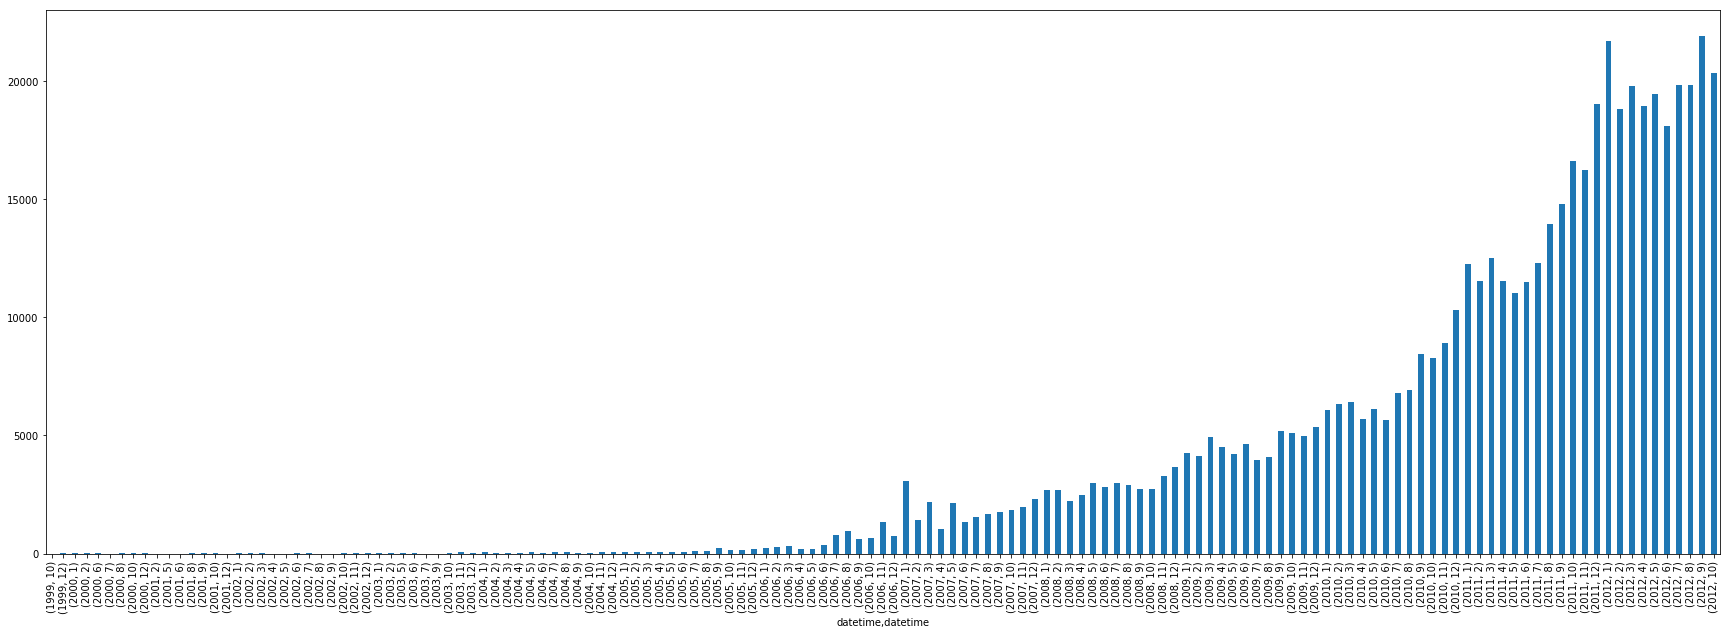

In [34]:
df['datetime'] = pd.to_datetime(df["Time"], unit='s')
df.groupby([df.datetime.dt.year, df.datetime.dt.month]).count()['ProductId'].plot(kind="bar",figsize=(30,10))

In [37]:

# Start with the summary data
df.Summary = df.Summary.astype(str)
downcase = lambda x: x.lower()
df.Summary.apply(downcase)

Id
1                                     good quality dog food
2                                         not as advertised
3                                     "delight" says it all
4                                            cough medicine
5                                               great taffy
6                                                nice taffy
7             great!  just as good as the expensive brands!
8                                    wonderful, tasty taffy
9                                                yay barley
10                                         healthy dog food
11                          the best hot sauce in the world
12        my cats love this "diet" food better than thei...
13                     my cats are not fans of the new food
14                                        fresh and greasy!
15                             strawberry twizzlers - yummy
16                 lots of twizzlers, just what you expect.
17                                   

In [40]:
df.Summary = df.Summary.astype(str)
df.Summary.ix[3]

/home/rakesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


'"Delight" says it all'

In [44]:
df.Summary = df.Summary.astype(str)
df.Summary.ix[1]

/home/rakesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


'Good Quality Dog Food'

In [42]:
df.Summary

Id
1                                     Good Quality Dog Food
2                                         Not as Advertised
3                                     "Delight" says it all
4                                            Cough Medicine
5                                               Great taffy
6                                                Nice Taffy
7             Great!  Just as good as the expensive brands!
8                                    Wonderful, tasty taffy
9                                                Yay Barley
10                                         Healthy Dog Food
11                          The Best Hot Sauce in the World
12        My cats LOVE this "diet" food better than thei...
13                     My Cats Are Not Fans of the New Food
14                                        fresh and greasy!
15                             Strawberry Twizzlers - Yummy
16                 Lots of twizzlers, just what you expect.
17                                   

In [46]:
df.Summary.value_counts()

Delicious!                                                     2462
Delicious                                                      2316
Yummy!                                                         1594
Yummy                                                          1268
Great product                                                  1091
Yum!                                                           1081
Excellent                                                       985
Love it!                                                        910
Great Product                                                   910
Great                                                           749
Great!                                                          748
Tasty                                                           645
Yum                                                             618
Disappointed                                                    587
Excellent!                                      

In [47]:
df.Summary.value_counts().head

<bound method NDFrame.head of Delicious!                                                     2462
Delicious                                                      2316
Yummy!                                                         1594
Yummy                                                          1268
Great product                                                  1091
Yum!                                                           1081
Excellent                                                       985
Love it!                                                        910
Great Product                                                   910
Great                                                           749
Great!                                                          748
Tasty                                                           645
Yum                                                             618
Disappointed                                                    587
Excellent!        

In [50]:
df.Summary.value_counts().describe

<bound method NDFrame.describe of Delicious!                                                     2462
Delicious                                                      2316
Yummy!                                                         1594
Yummy                                                          1268
Great product                                                  1091
Yum!                                                           1081
Excellent                                                       985
Love it!                                                        910
Great Product                                                   910
Great                                                           749
Great!                                                          748
Tasty                                                           645
Yum                                                             618
Disappointed                                                    587
Excellent!    

In [51]:

df.dtypes

ProductId                         object
UserId                            object
ProfileName                       object
HelpfulnessNumerator               int64
HelpfulnessDenominator             int64
Score                              int64
Time                               int64
Summary                           object
Text                              object
datetime                  datetime64[ns]
dtype: object